In [1]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.8 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

In [3]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=51aa471a547d27c628b2772576a32ae0c1c1aeeb0456bce1ed4857d72292f31f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [4]:
!pip install numpy

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram, plot_distribution, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.primitives import Sampler
from qiskit import *
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector

In [6]:
def execute_circuit(qc, shots=1024, binary=False, mode="sampler", reverse=False):

    if reverse:
        qc = qc.reverse_bits()

    if mode == "sampler":

        options = {"shots": shots}

        sampler = Sampler(options=options)

        job = sampler.run(qc)
        result = job.result()

        probability_dictionary = result.quasi_dists[0]

        if binary:
            return probability_dictionary.binary_probabilities()
        else:
            return probability_dictionary

    else:
        #remember that for statevector measurements are not needed
        sv = Statevector.from_instruction(qc)
        return sv

In [21]:
def fun_exc1(circuit):
    circuit.cx(0, 3)

In [22]:
def deutsch_josza(n_qubits=3):

    qr_input = QuantumRegister(n_qubits, 'input')
    qr_ancilla =  QuantumRegister(1, 'ancilla')

    # Para medir
    cr_output = ClassicalRegister(n_qubits, 'output')

    # Quantum circuit
    qc = QuantumCircuit(qr_input, qr_ancilla, cr_output)

    # H-gate para todos os qubits -ancilla
    qc.h(qr_input)

    #ancilla
    qc.x(qr_ancilla)
    qc.h(qr_ancilla)

    qc.barrier()

    # Aplicar a funcao - ORACLE
    fun_exc1(qc)

    qc.barrier()

    # H-gate para todos os qubits -ancilla, novamente
    qc.h(qr_input)

    qc.barrier()

    # Medicao
    qc.measure(qr_input, cr_output)

    return qc

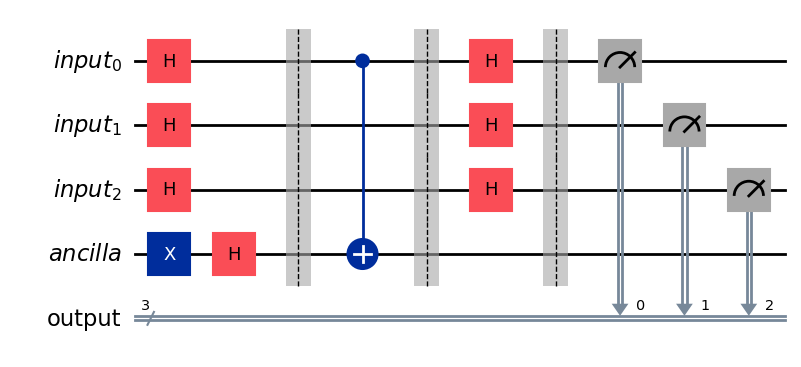

In [23]:
qc = deutsch_josza(3)
qc.draw(output="mpl")

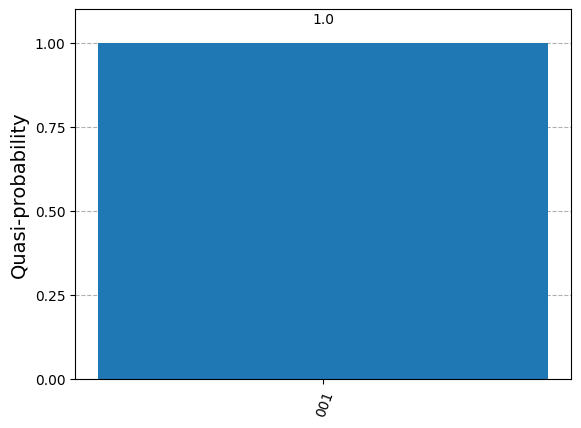

In [24]:
probs = execute_circuit(qc, shots=10000, binary=True, mode="sampler")
plot_histogram(probs)